In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get user inputs
R = float(input("Enter the sphere radius: "))
U = float(input("Enter the fluid velocity: "))
N = int(input("Enter the grid resolution (N x N x N): "))

# Create a 3D grid
X, Y, Z = np.mgrid[-2:2:complex(N), -2:2:complex(N), -2:2:complex(N)]
R_mesh = np.sqrt(X**2 + Y**2 + Z**2)

# Calculate potential flow solution
phi = U * (X + R**3 / (R_mesh**3) * X)
u = np.gradient(phi, X, axis=0)
v = np.gradient(phi, Y, axis=1)
w = np.gradient(phi, Z, axis=2)

# Calculate vorticity (curl)
curl_x = np.gradient(w, Y, axis=1) - np.gradient(v, Z, axis=2)
curl_y = np.gradient(u, Z, axis=2) - np.gradient(w, X, axis=0)
curl_z = np.gradient(v, X, axis=0) - np.gradient(u, Y, axis=1)

# Plot velocity field
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')
ax.quiver(X, Y, Z, u, v, w, length=0.1, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Velocity Field')

# Plot vorticity field
ax = fig.add_subplot(122, projection='3d')
ax.quiver(X, Y, Z, curl_x, curl_y, curl_z, length=0.1, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vorticity Field')


plt.show()

Enter the sphere radius: 2
Enter the fluid velocity: 5
Enter the grid resolution (N x N x N): 8000


In [1]:
# Importing package
from sympy import *
from sympy.abc import *

p_x,u_0=symbols('p_x, u_0')

u=Function('u')(y)
# Setting boundary condition
bc={u.subs(y,0):0,u.subs(y,h):u_0}
# Formingdifferential equation
de=Eq(mu*u.diff(y,y),p_x)
# Solving differentialequation
sol=dsolve(de,ics=bc)
simplify(expand(sol.rhs/u_0).coeff(p_x))
# Obtaining final result by dividing it by normalizing it with u_0
u_u0=expand(simplify(sol.rhs.subs(p_x,-alpha*2*mu*u_0/h**2))/u_0)
pprint(u_u0)


         2    
α⋅y   α⋅y    y
─── - ──── + ─
 h      2    h
       h      


In [25]:
import numpy

In [26]:
# Parameters
height = 100                      # grid height
width = 100                     # grid width
viscosity = 0.002                # viscosity
omega = 1./(3*viscosity + 0.5)   # relaxation parameter (a function of viscosity)
u0 = 0.05                         # initial in-flow speed (eastward)
four9ths = 4./9.                 # a constant
one9th   = 1./9.                 # a constant
one36th  = 1./36.                # a constant

# Microscopic densities
n0  = numpy.zeros(height*width)  # Naught
nN  = numpy.zeros(height*width)  # North
nS  = numpy.zeros(height*width)  # South
nE  = numpy.zeros(height*width)  # East
nW  = numpy.zeros(height*width)  # West
nNW = numpy.zeros(height*width)  # Northwest
nNE = numpy.zeros(height*width)  # Northeast
nSE = numpy.zeros(height*width)  # Southeast
nSW = numpy.zeros(height*width)  # Southwest

# Barriers
bar = numpy.zeros(height*width)  # Barriers

# Macroscopic density and velocity
rho = numpy.zeros(height*width)    # Cell density
ux  = numpy.zeros(height*width)    # Cell x-velocity
uy  = numpy.zeros(height*width)    # Cell y-velocity
speed2 = numpy.zeros(height*width) # Cell squared velocity

In [27]:
def stream():

    # Stream all internal cells
    for x in range(0, width-1):
        for y in range(1, height-1):
            # Movement north (Northwest corner)
            nN[y*width + x] = nN[y*width + x + width]
            # Movement northwest (Northwest corner)
            nNW[y*width + x] = nNW[y*width + x + width + 1]
            # Movement west (Northwest corner)
            nW[y*width + x] = nW[y*width + x + 1]
            # Movement south (Southwest corner)
            nS[(height-y-1)*width + x] = nS[(height-y-1-1)*width + x]
            # Movement southwest (Southwest corner)
            nSW[(height-y-1)*width + x] = nSW[(height-y-1-1)*width + x + 1]
            # Movement east (Northeast corner)
            nE[y*width + (width-x-1)] = nE[y*width + (width-(x+1)-1)]
            # Movement northeast (Northeast corner)
            nNE[y*width + (width-x-1)] = nNE[y*width + width + (width-(x+1)-1)]
            # Movement southeast (Southeast corner)
            nSE[(height-y-1)*width + (width-x-1)] = nSE[(height-y-1-1)*width +
                                                        (width-(x+1)-1)]

    # Tidy up the edges
    x += 1
    for y in range(1, height-1):
        # Movement north on right boundary (Northwest corner)
        nN[y*width + x] = nN[y*width + x + width]
        # Movement south on right boundary (Southwest corner)
        nS[(height-y-1)*width + x] = nS[(height-y-1-1)*width + x]

In [28]:
def bounce():

    # Loop through all interior cells
    for x in range(2, width-2):
        for y in range(2, height-2):

            # If the cell contains a boundary . . .
            if (bar[y*width + x]):

                # Push densities back from whence they came
                nN[(y-1)*width + x] = nS[y*width + x]
                nS[(y+1)*width + x] = nN[y*width + x]
                nE[y*width + x + 1] = nW[y*width + x]
                nW[y*width + (x-1)] = nE[y*width + x]
                nNE[(y-1)*width + (x+1)] = nSW[y*width + x]
                nNW[(y-1)*width + (x-1)] = nSE[y*width + x]
                nSE[(y+1)*width + (x+1)] = nNW[y*width + x]
                nSW[(y+1)*width + (x-1)] = nNE[y*width + x]

                # Clear the densities in the barrier cells
                n0[y*width + x] = 0
                nN[y*width + x] = 0
                nS[y*width + x] = 0
                nE[y*width + x] = 0
                nW[y*width + x] = 0
                nNE[y*width + x] = 0
                nNW[y*width + x] = 0
                nSE[y*width + x] = 0
                nSW[y*width + x] = 0

In [29]:
def collide():

    # Do not touch cells on top, bottom, or left
    for x in range(1, width-1):
        for y in range(1, height-1):

            # What's our current index?
            i = y*width + x

            # Skip over cells containing barriers
            if (bar[i]):
                continue

            else:
                # Compute the macroscopic density
                rho[i] = n0[i] + nN[i] + nE[i] + nS[i] + nW[i] + nNE[i] + nSE[i] + nSW[i] + nNW[i]
                # Compute the macroscopic velocities
                if (rho[i] > 0):
                    ux[i]  = (nE[i] + nNE[i] + nSE[i] - nW[i] - nNW[i] - nSW[i]) * (1-(rho[i]-1)+((rho[i]-1)**2.))
                    uy[i]  = (nN[i] + nNE[i] + nNW[i] - nS[i] - nSE[i] - nSW[i]) * (1-(rho[i]-1)+((rho[i]-1)**2.))

                # Pre-compute some convenient constants
                one9th_rho = one9th * rho[i]
                one36th_rho = one36th * rho[i]
                vx3 = 3 * ux[i]
                vy3 = 3 * uy[i]
                vx2 = ux[i] * ux[i]
                vy2 = uy[i] * uy[i]
                vxvy2 = 2 * ux[i] * uy[i]
                v2 = vx2 + vy2
                speed2[i] = v2
                v215 = 1.5 * v2

                # Update densities
                nE[i]  += omega * (   one9th_rho * (1 + vx3       + 4.5*vx2        - v215) - nE[i])
                nW[i]  += omega * (   one9th_rho * (1 - vx3       + 4.5*vx2        - v215) - nW[i])
                nN[i]  += omega * (   one9th_rho * (1 + vy3       + 4.5*vy2        - v215) - nN[i])
                nS[i]  += omega * (   one9th_rho * (1 - vy3       + 4.5*vy2        - v215) - nS[i])
                nNE[i] += omega * (  one36th_rho * (1 + vx3 + vy3 + 4.5*(v2+vxvy2) - v215) - nNE[i])
                nNW[i] += omega * (  one36th_rho * (1 - vx3 + vy3 + 4.5*(v2-vxvy2) - v215) - nNW[i])
                nSE[i] += omega * (  one36th_rho * (1 + vx3 - vy3 + 4.5*(v2-vxvy2) - v215) - nSE[i])
                nSW[i] += omega * (  one36th_rho * (1 - vx3 - vy3 + 4.5*(v2+vxvy2) - v215) - nSW[i])

                # Conserve mass
                n0[i]   = rho[i] - (nE[i]+nW[i]+nN[i]+nS[i]+nNE[i]+nSE[i]+nNW[i]+nSW[i]);

In [30]:
def initialize(xtop, ytop, yheight, u0=u0):
    xcoord = 0
    ycoord = 0

    count = 0
    for i in range(height*width):
        n0[i] = four9ths* (1 - 1.5*(u0**2.))
        nN[i] = one9th  * (1 - 1.5*(u0**2.))
        nS[i] = one9th  * (1 - 1.5*(u0**2.))
        nE[i] = one9th  * (1 + 3*u0 + 4.5*(u0**2.) - 1.5*(u0**2.))
        nW[i] = one9th  * (1 - 3*u0 + 4.5*(u0**2.) - 1.5*(u0**2.))
        nNE[i]= one36th * (1 + 3*u0 + 4.5*(u0**2.) - 1.5*(u0**2.))
        nSE[i]= one36th * (1 + 3*u0 + 4.5*(u0**2.) - 1.5*(u0**2.))
        nNW[i]= one36th * (1 - 3*u0 + 4.5*(u0**2.) - 1.5*(u0**2.))
        nSW[i]= one36th * (1 - 3*u0 + 4.5*(u0**2.) - 1.5*(u0**2.))

        rho[i] =  n0[i] + nN[i] + nS[i] + nE[i] + nW[i] + nNE[i] + nSE[i] + nNW[i] + nSW[i]

        ux[i]  = (nE[i] + nNE[i] + nSE[i] - nW[i] - nNW[i] - nSW[i]) * (1-(rho[i]-1)+((rho[i]-1)**2.))
        uy[i]  = (nN[i] + nNE[i] + nNW[i] - nS[i] - nSE[i] - nSW[i]) * (1-(rho[i]-1)+((rho[i]-1)**2.))

        if (xcoord==xtop):
            if (ycoord >= ytop):
                if (ycoord < (ytop+yheight)):
                    count += 1
                    bar[ycoord*width + xcoord] = 1

        xcoord = (xcoord+1) if xcoord<(width-1) else 0
        ycoord = ycoord if (xcoord != 0) else (ycoord + 1)

In [31]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
plt.rcParams["figure.figsize"] = (50,3)

Done!


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2000x500', '-pix_fmt', 'rgba', '-r', '600', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', './animation5.mp4']' returned non-zero exit status 255.

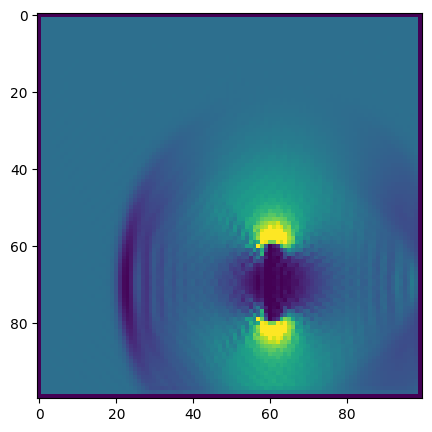

In [32]:
# Frames per second, and number of seconds
fps = 600
nSeconds = 15

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(20,5) )

# Initialize the barriers (occurs in previous section)
initialize(60, 60, 20)

# Don't animate first few frames
for i in range(10):
    stream()
    bounce()
    collide()

# Plot which we'll be animating
a = speed2
im = plt.imshow(a.reshape(height,width))

# Animation function (stream, bounce, collide, and update heatmap)
def animate_func(i):
    stream()
    bounce()
    collide()
    im.set_array(speed2.reshape(height, width))
    return [im]

# Animation object
anim = animation.FuncAnimation(
                               fig,
                               animate_func,
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

print('Done!')

# Generate an mp4 video of the animation
f = r"./animation5.mp4"
writervideo = animation.FFMpegWriter(fps=600)
anim.save(f, writer=writervideo)